In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from pylab import mpl

mpl.rcParams["font.family"] = ["Hei"]
mpl.rcParams["axes.unicode_minus"] = False


,603110.SH,002650.SZ,600109.SH,603599.SH
count,1258.000000,1671.000000,1978.000000,1845.000000
mean,24.531375,6.611634,12.117856,23.896656
std,10.373797,3.469563,4.276743,11.223142
min,10.010000,3.000000,5.820000,10.220000
25%,15.112500,4.180000,9.052500,15.480000
50%,21.455000,5.970000,11.330000,18.420000
75%,33.690000,7.180000,13.530000,31.340000
max,50.680000,24.190000,33.230000,96.920000


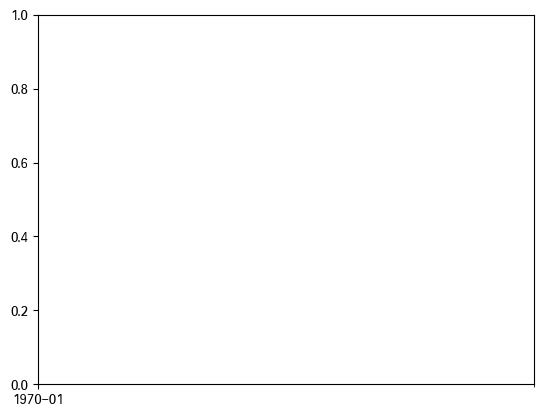

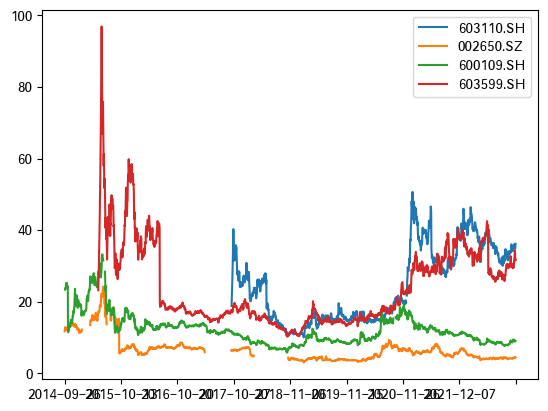

In [2]:
df = pd.read_csv("data/data.csv", header=0, index_col=0)


# 获取每月数据
months = mdates.MonthLocator()
# 获取每日数据
days = mdates.DayLocator()
fig, ax = plt.subplots()
# 设定主/次刻度
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
# 设定格式
timeFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(timeFmt)
df.plot()

df.describe()

In [3]:
stock_weight = np.array([0.15, 0.25, 0.35, 0.25]) # 组合权重

daily_returns = df.pct_change().dropna()  # 个股日收益率
daily_returns.describe()

R_cov = daily_returns.cov()  # 协方差矩阵
R_corr = daily_returns.corr()  # 相关系数
R_std = daily_returns.std() # 整体风险
R_mean = daily_returns.mean() # 个股日均收益率

Rp_daily = np.sum(stock_weight * R_mean)  # 组合日均收益率
Vp_daily = np.sqrt(np.dot(stock_weight, np.dot(R_cov, stock_weight.T)))  # 组合日波动率



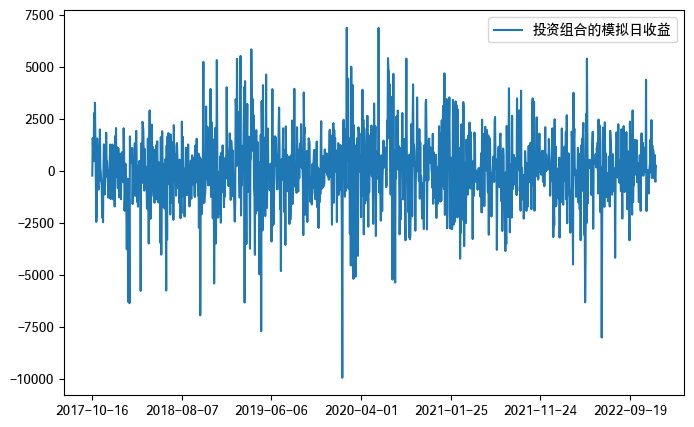

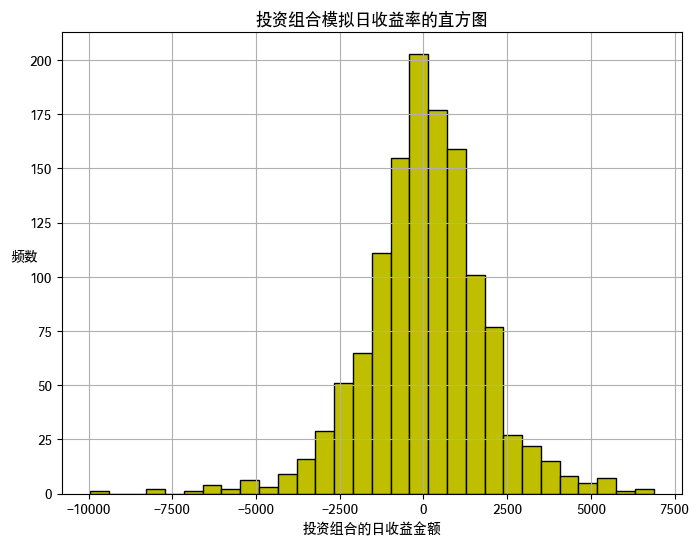

In [4]:
Value_port = 100000


# 历史模拟法
Value_asset = Value_port * stock_weight
Return_history = np.dot(daily_returns, Value_asset)
Return_history = pd.DataFrame(
    Return_history, index=daily_returns.index, columns=["投资组合的模拟日收益"]
)
Return_history.describe()
Return_history.plot(figsize=(8, 5))


plt.figure(figsize=(8, 6))
plt.hist(np.array(Return_history), bins=30, facecolor="y", edgecolor="k")
plt.xlabel("投资组合的日收益金额",)
plt.ylabel("频数", rotation=0)
plt.title(
    "投资组合模拟日收益率的直方图",
)
plt.grid(True)
plt.show()



In [5]:
st.kstest(rvs=Return_history['投资组合的模拟日收益'],cdf='norm') #KS检验是否符合正态分布

KstestResult(statistic=0.5190166130411283, pvalue=6.8891821e-316, statistic_location=3.3242548117429367, statistic_sign=-1)

In [6]:

# 开始计算VaR与ES值
def VaR_history(a,q):
    VaR=np.percentile(a,(1-q)*100)
    return abs(VaR)

def ES_history(a,q):
    VaR=np.percentile(a,(1-q)*100)
    ES=a[a<=VaR].mean()
    return abs(np.array(ES))

VaR99_1day_history=VaR_history(a=Return_history,q=0.99)
ES99_1day_history=ES_history(a=Return_history,q=0.99)
print('历史模拟法计算持有1天，置信水平99%的VaR',round(VaR99_1day_history,2))
print('历史模拟法计算持有1天，置信水平99%的ES',np.round(ES99_1day_history,2))

VaR95_1day_history=VaR_history(a=Return_history,q=0.95)
ES95_1day_history=ES_history(a=Return_history,q=0.95)
print('历史模拟法计算持有1天，置信水平95%的VaR',round(VaR95_1day_history,2))
print('历史模拟法计算持有1天，置信水平95%的ES',np.round(ES95_1day_history,2))
    
VaR99_10day_history=np.sqrt(10)*VaR99_1day_history
ES99_10day_history=np.sqrt(10)*ES99_1day_history
print('历史模拟法计算持有10天，置信水平99%的VaR',round(VaR99_10day_history,2))
print('历史模拟法计算持有10天，置信水平99%的ES',np.round(ES99_10day_history,2))

VaR95_10day_history=np.sqrt(10)*VaR95_1day_history
ES95_10day_history=np.sqrt(10)*ES95_1day_history
print('历史模拟法计算持有10天，置信水平95%的VaR',round(VaR95_10day_history,2))
print('历史模拟法计算持有10天，置信水平95%的ES',np.round(ES95_10day_history,2))

历史模拟法计算持有1天，置信水平99%的VaR 5221.09
历史模拟法计算持有1天，置信水平99%的ES [6587.77]
历史模拟法计算持有1天，置信水平95%的VaR 2821.32
历史模拟法计算持有1天，置信水平95%的ES [4206.13]
历史模拟法计算持有10天，置信水平99%的VaR 16510.53
历史模拟法计算持有10天，置信水平99%的ES [20832.34]
历史模拟法计算持有10天，置信水平95%的VaR 8921.78
历史模拟法计算持有10天，置信水平95%的ES [13300.94]


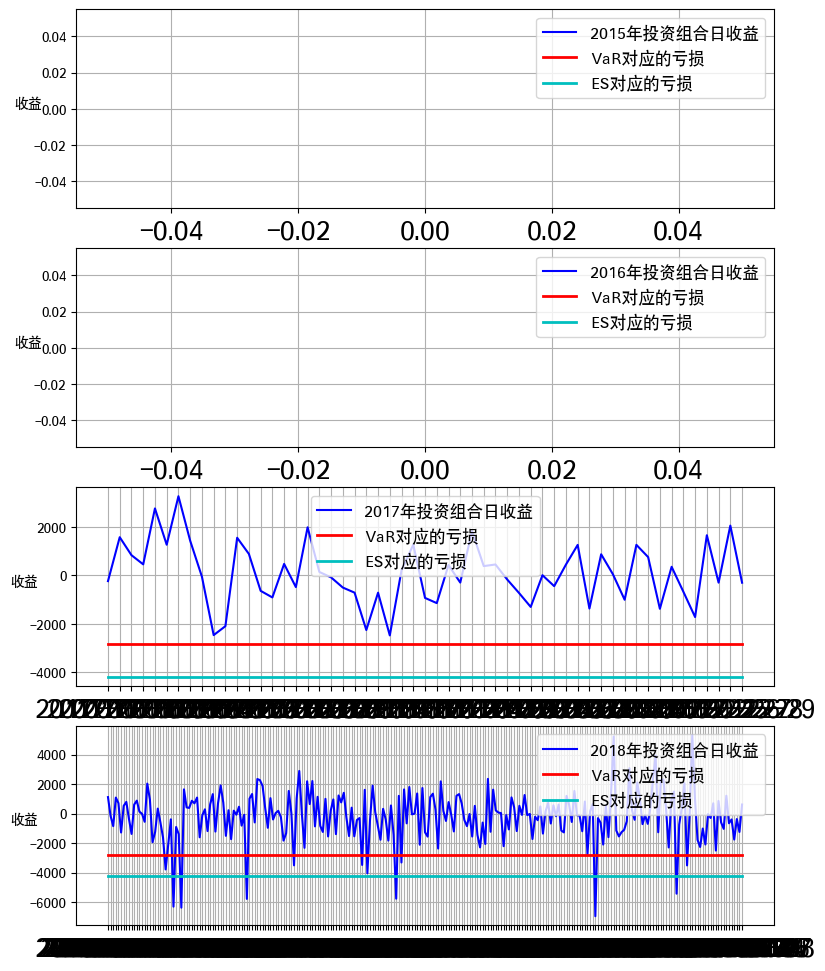

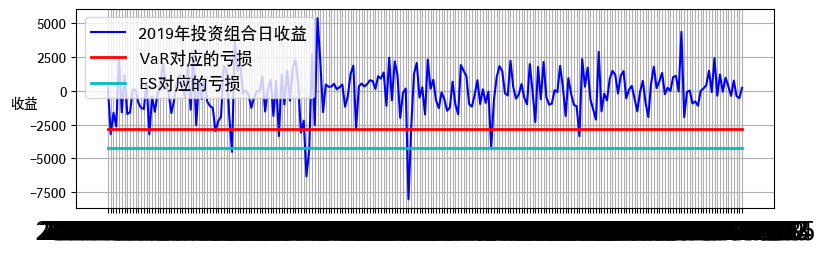

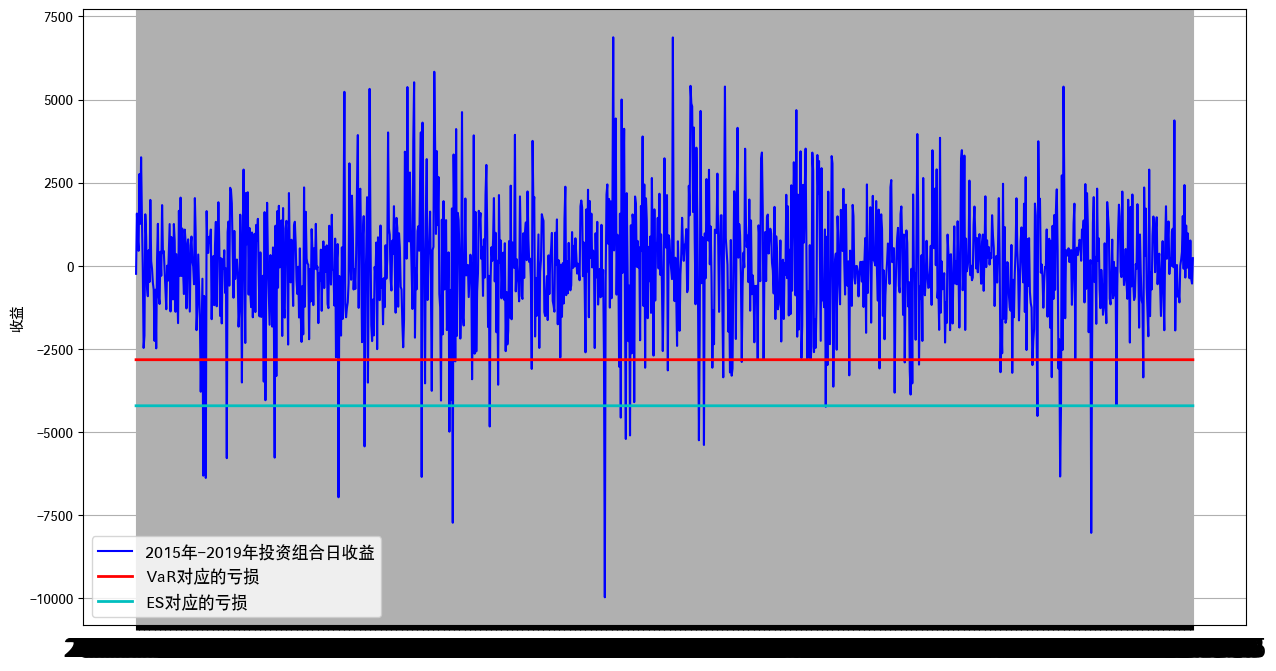

In [7]:
# 回溯检验--方差协方差法
Return_2015 = Return_history.loc["2015-01-01":"2015-12-31"]
Return_2016 = Return_history.loc["2016-01-01":"2016-12-31"]
Return_2017 = Return_history.loc["2017-01-01":"2017-12-31"]
Return_2018 = Return_history.loc["2018-01-01":"2018-12-31"]
Return_2019 = Return_history.loc["2022-01-01":"2022-12-31"]
Return_2019 = Return_history.loc["2022-01-01":"2022-12-31"]
Return = Return_history.loc["2015-01-01":"2022-12-31"]

days_2015 = len(Return_2015)
days_2016 = len(Return_2016)
days_2017 = len(Return_2017)
days_2018 = len(Return_2018)
days_2019 = len(Return_2019)
days = len(Return)

VaR_2015 = pd.DataFrame(
    -VaR95_1day_history * np.ones_like(Return_2015), index=Return_2015.index
)
ES_2015 = pd.DataFrame(
    - ES95_1day_history * np.ones_like(Return_2015), index=Return_2015.index
 )# type: ignore

VaR_2016 = pd.DataFrame(
    -VaR95_1day_history * np.ones_like(Return_2016), index=Return_2016.index
)
ES_2016 = pd.DataFrame(
    -ES95_1day_history * np.ones_like(Return_2016), index=Return_2016.index
)

VaR_2017 = pd.DataFrame(
    -VaR95_1day_history * np.ones_like(Return_2017), index=Return_2017.index
)
ES_2017 = pd.DataFrame(
    -ES95_1day_history * np.ones_like(Return_2017), index=Return_2017.index
)

VaR_2018 = pd.DataFrame(
    -VaR95_1day_history * np.ones_like(Return_2018), index=Return_2018.index
)
ES_2018 = pd.DataFrame(
    -ES95_1day_history * np.ones_like(Return_2018), index=Return_2018.index
)

VaR_2019 = pd.DataFrame(
    -VaR95_1day_history * np.ones_like(Return_2019), index=Return_2019.index
)
ES_2019 = pd.DataFrame(
    -ES95_1day_history * np.ones_like(Return_2019), index=Return_2019.index
)

VaR = pd.DataFrame(-VaR95_1day_history * np.ones_like(Return), index=Return.index)
ES = pd.DataFrame(-ES95_1day_history * np.ones_like(Return), index=Return.index)

# 绘图
plt.figure(figsize=(9, 15))
plt.subplot(5, 1, 1)
plt.plot(Return_2015, "b-", label="2015年投资组合日收益")
plt.plot(VaR_2015, "r", label="VaR对应的亏损", lw=2.0)
plt.plot(ES_2015, "c", label="ES对应的亏损", lw=2.0)
plt.ylabel("收益", rotation=0)
plt.xticks(fontsize=20)
plt.legend(fontsize=12)
plt.grid("True")

plt.subplot(5, 1, 2)
plt.plot(Return_2016, "b-", label="2016年投资组合日收益")
plt.plot(VaR_2016, "r", label="VaR对应的亏损", lw=2.0)
plt.plot(ES_2016, "c", label="ES对应的亏损", lw=2.0)
plt.ylabel("收益", rotation=0)
plt.xticks(fontsize=20)
plt.legend(fontsize=12)
plt.grid("True")

plt.subplot(5, 1, 3)
plt.plot(Return_2017, "b-", label="2017年投资组合日收益")
plt.plot(VaR_2017, "r", label="VaR对应的亏损", lw=2.0)
plt.plot(ES_2017, "c", label="ES对应的亏损", lw=2.0)
plt.ylabel("收益", rotation=0)
plt.xticks(fontsize=20)
plt.legend(fontsize=12)
plt.grid("True")

plt.subplot(5, 1, 4)
plt.plot(Return_2018, "b-", label="2018年投资组合日收益")
plt.plot(VaR_2018, "r", label="VaR对应的亏损", lw=2.0)
plt.plot(ES_2018, "c", label="ES对应的亏损", lw=2.0)
plt.ylabel("收益", rotation=0)
plt.xticks(fontsize=20)
plt.legend(fontsize=12)
plt.grid("True")
plt.show()

plt.figure(figsize=(9, 15))
plt.subplot(5, 1, 5)
plt.plot(Return_2019, "b-", label="2019年投资组合日收益")
plt.plot(VaR_2019, "r", label="VaR对应的亏损", lw=2.0)
plt.plot(ES_2019, "c", label="ES对应的亏损", lw=2.0)
plt.ylabel("收益", rotation=0)
plt.xticks(fontsize=20)
plt.legend(fontsize=12)
plt.grid("True")
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(Return, "b-", label="2015年-2019年投资组合日收益")
plt.plot(VaR, "r", label="VaR对应的亏损", lw=2.0)
plt.plot(ES, "c", label="ES对应的亏损", lw=2.0)
plt.ylabel("收益")
plt.xticks(fontsize=20)
plt.legend(fontsize=12)
plt.grid("True")
plt.show()


In [8]:

dayexcept=len(Return[Return['投资组合的模拟日收益']<-VaR95_1day_history])
dayexceptES=len(Return[Return['投资组合的模拟日收益']<-ES95_1day_history])
print('2015-2019年超过VaR的天数',dayexcept)
print('2015-2019年超过VaR的天数占交易天数的比例',round(dayexcept/days,4))
print('2015-2019年超过ES的天数',dayexceptES)
print('2015-2019年超过ES的天数占交易天数的比例',round(dayexceptES/days,4))

ValueError: ('Lengths must match to compare', (1259,), (1,))

In [ ]:
dayexcept_2015=len(Return_2015[Return_2015['投资组合的模拟日收益']<-VaR95_1day_history])
dayexceptES_2015=len(Return_2015[Return_2015['投资组合的模拟日收益']<-ES95_1day_history])
print('2015年超过VaR的天数',dayexcept_2015)
print('2015年超过VaR的天数占全年交易天数的比例',round(dayexcept_2015/days_2015,4))
print('2015年超过ES的天数',dayexceptES_2015)
print('2015年超过ES的天数占交易天数的比例',round(dayexceptES_2015/days_2015,4))

ValueError: ('Lengths must match to compare', (0,), (1,))